#5장 서포트 벡터 머신(SVM)실습

머신러닝과 응용

G202358021 안종혁


In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##5.1 선형 SVM 분류

iris 데이터에서 세토사와 버시컬러 품종만을 대상으로 선형 SVM 분류기를 학습한다.(hard margin)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                      # 특성 2개(꽃잎 길이, 꽃잎 너비)
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)      # 세토사와 버시컬러만 대상임.
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# 선형 SVM 분류 모델
svm_clf = SVC(kernel="linear",
             )  # C=무한대. 즉, 하드 마진 분류임.
svm_clf.fit(X, y)

SVC(kernel='linear')

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]            # 결정경계 파라미터(w0, w1)
    b = svm_clf.intercept_[0]       # 절편(b)

    # 결정경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]    # 결정경계

    margin = 1/w[1]                                 # 마진(도로 폭)
    gutter_up = decision_boundary + margin          # 도로 경계(윗쪽)
    gutter_down = decision_boundary - margin        # 도로 경계(아랫쪽)

    # 서포트 벡터 표시
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

    # 결정경계 및 도로 경계 그리기
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

다음 코드에서 왼편은 선분을 극닥적으로 그린 일반적 선형 분류기이다.

반면 오른편은 SVM 분류(하드 마진)의 장점을 잘 보여준 그림이다.

그림 저장: large_margin_classification_plot


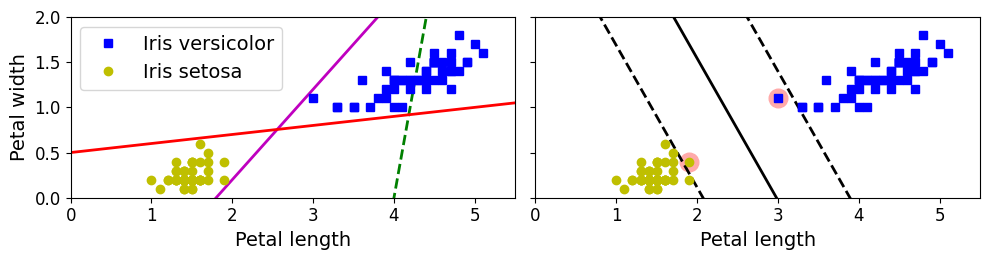

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼쪽 그림
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# 오른쪽 그림
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

위 코드는 SVM이 특성 축척에 민감하다는 것을 잘 보이는 그림과 같다.

학습 데이터: 특성 수를 2개로 하는 작위적으로 지정된 데이터 네개

왼편 그림은 축척의 조정이 없고 오른편 그림은 축척 조정의 전처리를 추가한 그림이다.

그림 저장: sensitivity_to_feature_scales_plot


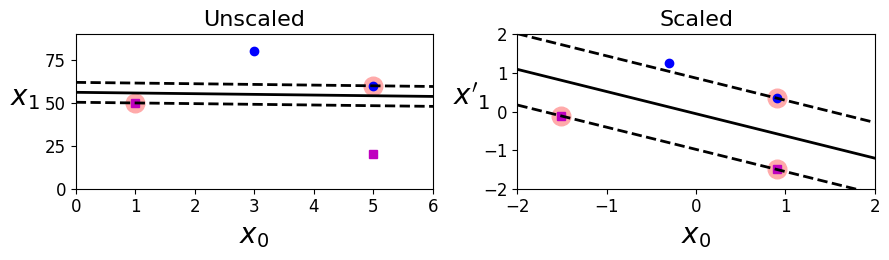

In [5]:
# 학습 데이터 4개
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# SVM 훈련
svm_clf = SVC(kernel="linear", C=100)   # 마진 조금 허용
svm_clf.fit(Xs, ys)

# 왼편 그림
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# 오른편 그림(축척 조정 전처리 사용)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

###5.1.1 소프트 마진 분류

앞서 사용한 iris 데이터에서 이상치를 추가한 결과이다.

SVM을 이용한 하드 마진 분류의 문제점을 알 수 있다.

왼편과 오른쪽 그림에 각각 사용되어진 이상치의 꽃잎 길이/너비 특성은 다음과 같다.

[3.4,1.3], [3.2,0.8]

In [6]:
# 이상치 두 개
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# 왼편 그림 훈련 세트
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# 오른편 그림 훈련 세트
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

그림 저장: sensitivity_to_outliers_plot


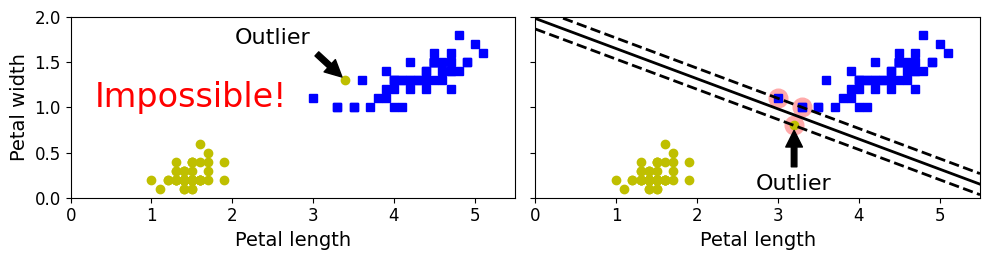

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼편 그림: 하드 마진 분류 불가능
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# 오른편 그림: 좋지 않은 하드 마진 분류. SVC와 linear 커널 사용.
svm_clf2 = SVC(kernel="linear", C=10**9)     # 마진 매우 작게 설정
svm_clf2.fit(Xo2, yo2)

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

아래 코드는 마진의 오류를 허용하는 소프트 마진 분류를 지원하는 선형 SVM 학습법을 보여준다.

훈련 세트: 붓꽃 데이터 전체

타깃: 버지니카 품종 여부 (음성 0, 양성 1)

표준화 축척 조정 전처리 사용

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                   # 특성: 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # 타깃: 버지니카(Iris-Verginica) 품종 여부

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

아래 코드는 소프트 마진 분류에서 사용되는 규제의 역할을 보여준다.

규제에 선형적으로 반비례하여 규제의 강도가 전해지게 된다.

C가 무한대이게 되면 마진을 전혀 허용하지 않기에 하드 마진 분류모델이 된다고 할 수있다.

In [9]:
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)     # C=1
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)   # C=100

# 축척 조정 전처리 사용
scaler = StandardScaler()

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# 훈련
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [10]:
# 축척이 조정되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
w1 = svm_clf1.coef_[0] / scaler.scale_                            # 기울기 파라미터
w2 = svm_clf2.coef_[0] / scaler.scale_                            # 기울기 파라미터

# 새로운 파라미터와 편향 지정
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기: libsvm과 달리 liblinear 라이브러리에서 제공되지 않기에 직접 넣어줌.
# 부울 인덱싱을 이용하여 결정경계 도로 안에 위치한 값들을 서포트 벡터로 지정함.
t = y * 2 - 1                                               # +1, -1 값
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

왼편 그림은 C=1일때이며 오른편 그림은 C=100일때의 그림을 나타낸다.

그림 저장: regularization_plot


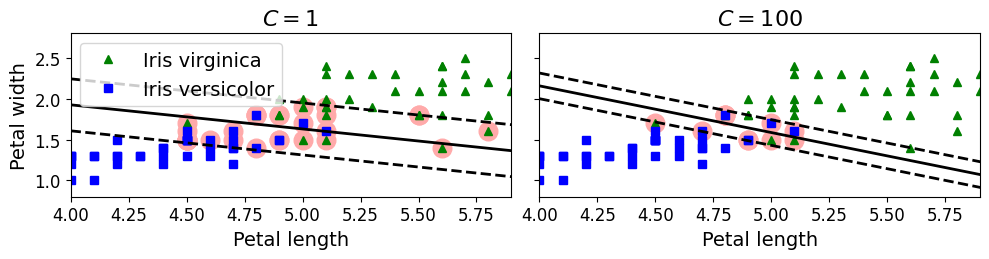

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼편 그림: svm_clf1 모델
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# 오른편 그림: svm_clf2 모델
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

##5.2 비선형 SVM 분류

시이킷런의 SVC클래스가 비선형 SVM의 분류를 지원하며 LinearSVC 클래스는 선형 분류만 지원한다.

아래 코드는 2차 다항 특성을 추가할 경우 비선형 분류 문제를 선형 분류로 해결할 수 있음을 알 수 있다.

왼편의 그래프는 선형 분류가 불가능하며 오른편 그래프는 2차 다항 특성을 추가한 결과

In [12]:
# -4에서 4 사이의 9개의 점 활용: 원래 한 개의 특성만 사용
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

# 2차 다항 특성 추가
X2D = np.c_[X1D, X1D**2]

# 타깃: 원점에 가까운 5개 데이터만 양성
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

그림 저장: higher_dimensions_plot


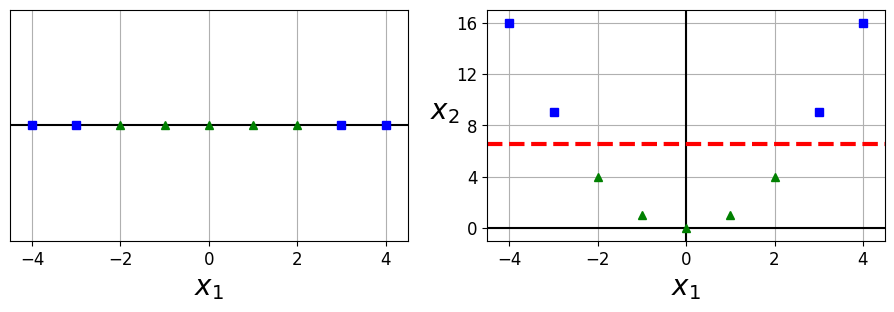

In [13]:
plt.figure(figsize=(10, 3))

# 왼편 그래프
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")          # 파랑 네모
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")          # 초록 세모
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

# 오른편 그래프
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")       # 파랑 네모
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")       # 초록 세모
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # 빨강 실선
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

아래 코드는 moons 데이터셋을 이용한다. 위 데이터셋은 지정된 데이터가 선형 분류가 불가능한 두가지의 반달 모양으로 구분되어있다.

X는 x,y 좌표로 구성된 100개의 데이터를 담으면서 y는 100개 샘플의 label만을 담고 있다.

아래 코드는 moons 데이터셋을 색깔과 모양으로 구분한 산점도를 그린다.

In [16]:
# 100개의 샘플로 구성된 moons 데이터셋 준비
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

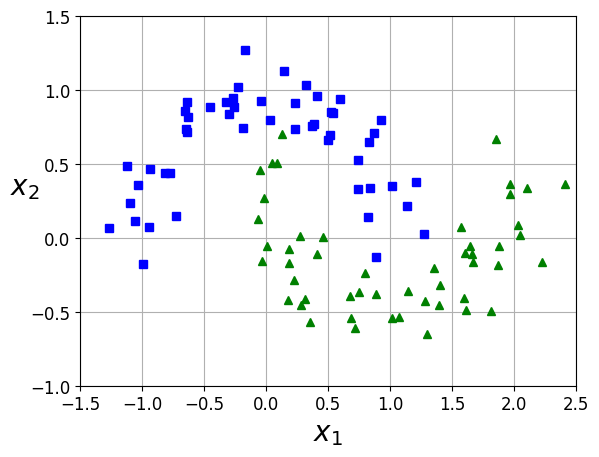

In [18]:
# 산점도 그리기 함수
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")   # 파랑 네모: 음성 데이터
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")   # 초록 세모: 양성 데이터
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

아래 코드는 3차 다항 특성을 추가할 경우에 moons 데이터셋을 선형 분류로 해결할 수 있음을 보이는 그림을 그린다.

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

그림 저장: moons_polynomial_svc_plot


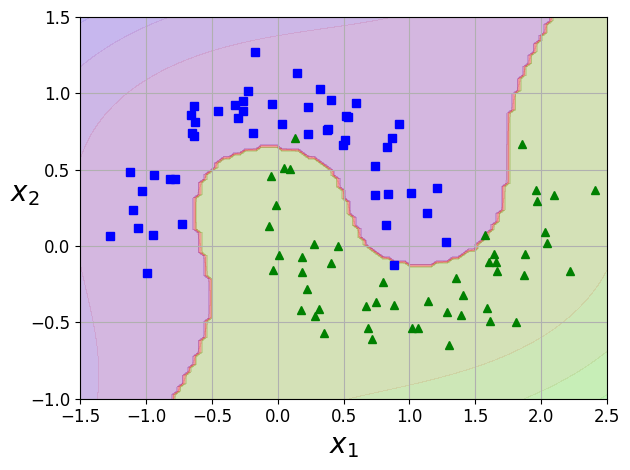

In [20]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]

    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)       # 결정경계 그리기
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)   # 등고선 그리기

#위 코드는 3차 다항 특성을 추가하여 훈련된 SVM 분류기의 성능을 보인다.
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

###5.2.1 다항 커널

항 특성 추가 기법은 모든 선형 회귀/분류 모델과 함께 사용할 수 있다.

아래 코드는 3차와 10차 다항 특성을 추가한 효과를 이용하여 moons 데이터셋을 분류한 결과를 그림으로 보여준다.

In [21]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))  # 3차 다항 커널 활용
    ])
poly_kernel_svm_clf.fit(X, y)

# 10차 다항 커널 활용

poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

각각 왼편과 오른편의 다항특성(degree)은 3과 10이며 coef0값은 1과 100이며 값과 비례하여 추가되는 고차항의 영향력에 대한 값이다.

그림 저장: moons_kernelized_polynomial_svc_plot


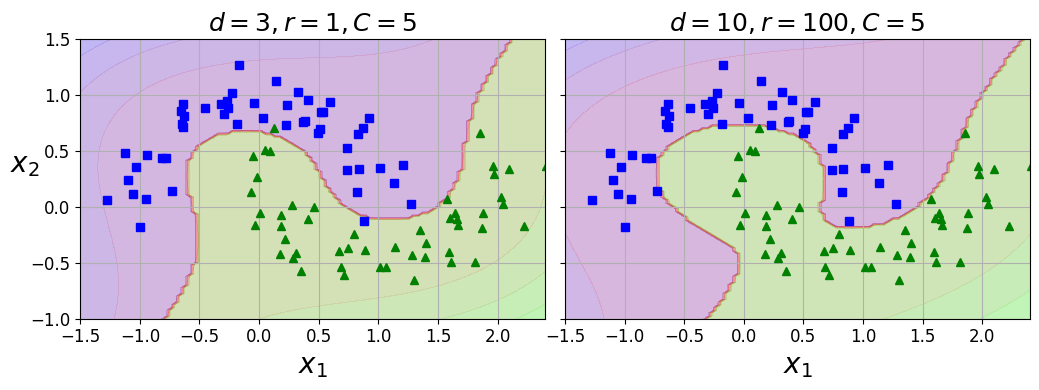

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

# 오른편 그림
plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

###5.2.2 유사도 특성

유사도 특성: 랜드마크라 불리는 특정 샘플과 각 샘플 사이의 유사도로 이루어진 특성

위 코드는 가우시안 RBF식이다.$l$인 랜드마크와 샘플 $x$사이의 유사도를 함수값으로 계산하여 $\gamma$ 값이 클수록 가까운 샘플을 선호하게 된다.

단 이때 모델의 자유도를 높이게 되어서 과대적합 위험이 커지게 된다.

In [24]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

아래 코드는 선형적으로 구분하기 어려운 데이터셋을 가우시간 RBF함수를 적용하여  선형적으로 구분할 수 있음을 보여주는 코드이다.

코드에 사용된 랜드마크는 -2와 1이며 2개의 유사도 특성이 데이터셋에 추가되어진다.

In [25]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)

# 왼편 그림에 사용되는 유사도 특성 2개: 방사 기저 함수의 그래프 그리기
x2s = gaussian_rbf(x1s, -2, gamma)   # 랜드마크 -2와의 유사도 특성
x3s = gaussian_rbf(x1s, 1, gamma)    # 랜드마크 1과의 유사도 특성

# 오른편 그림에 사용되는 2개의 유사도 특성. 원시 특성 X1D의 유사도 특성이지만 그림에는 표시하지 않음.
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

$x=-1$과 두 개의 랜드마크 사이의 유사도를 구하는 식은 아래 코드로 알 수 있다.

In [26]:
x1_example = X1D[3, 0]   # -1

for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


아래 그림에서 $X$로 표기된 점이 $x=-1$에 해당하게 된다.

그림 저장: kernel_method_plot


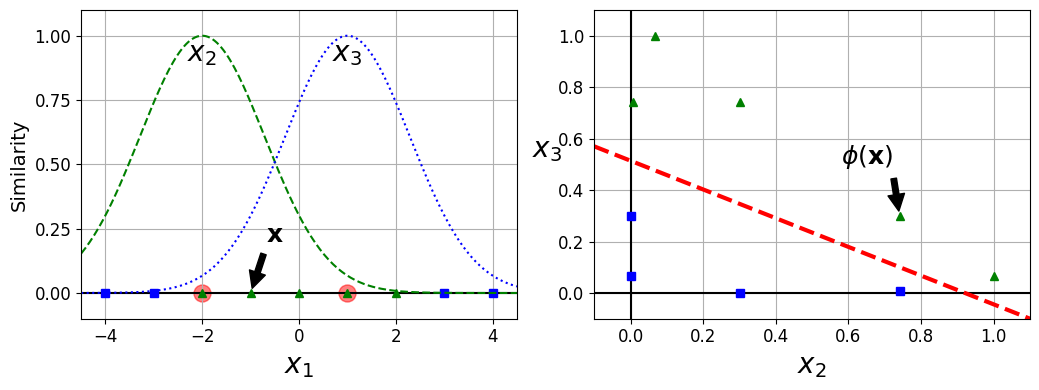

In [27]:
plt.figure(figsize=(10.5, 4))

# 왼편 그림: 종 모양 방사 기저 함수 그래프
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# 오른편 그림: 원시 데이터셋 X1D를 이용한 두 개의 유사도 특성을 이용하여 선형 분류 가능함을 보여줌.
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

###5.2.3 가우시안 RBF 커널

따라서 모든 샘플을 랜드마크로서 지정하는 것이 가장 간단하지만 이러면 특성 수가 샘플 수 만큼 늘어나기 때문에 많은 특성이 생겨나게 된다.

이때 RBF커널을 사용하면 실제로는 유사도 특성을 추가하지 않지만 유사한 효과를 내게 할 수 있다.

아래 코드는 각각 2개의 감마와 C의 조합인 네가지의 경우를 보여준다.

그림 저장: moons_rbf_svc_plot


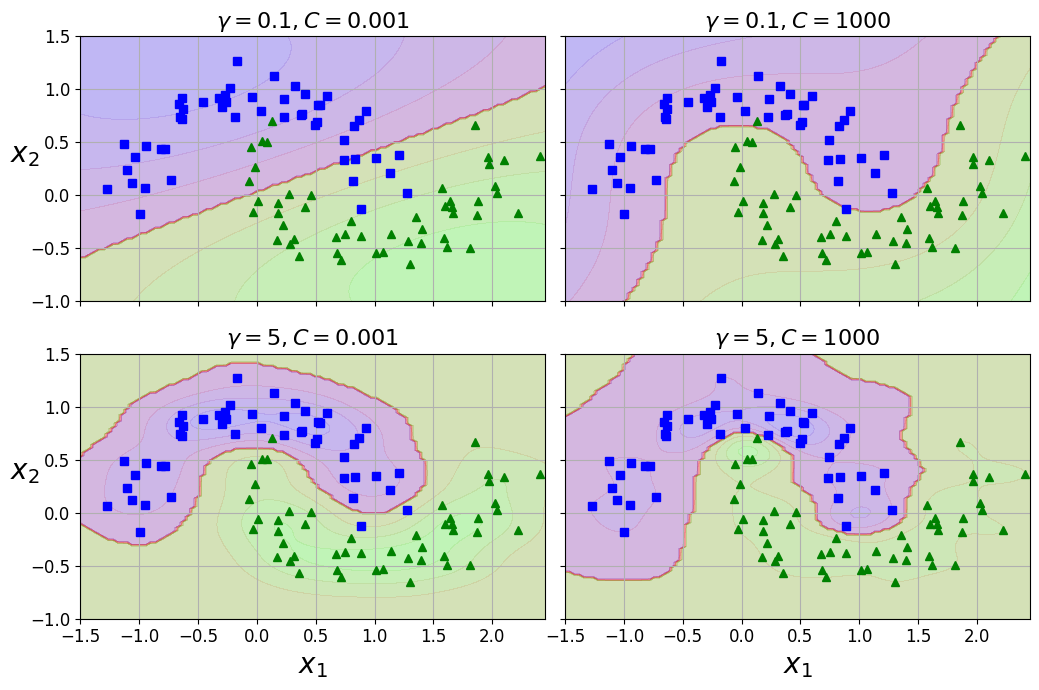

In [28]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)  # gamma와 C의 조합 4 가지

# RBF 커널 사용 SVC 모델 4 개 리스트
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# 그림 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

##5.3 SVM 회귀

아래 코드는 선형 SVM 회귀에 대한 설명을 위하여 선형 회귀 학습이 가능한 샘플을 잡음과 함께 생성한다.

In [29]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

epsilon 값을 1.5와 0.5로 하는 두개의 모델을 만든다.

위 값은 결정 도로의 폭 지정값이다.

In [30]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [31]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# 두 `LinearSVR` 회귀 모델의 마진 오류
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# 경계도로 폭(epsilon)을 보여주기 위한 좌표 지정
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

SVM 회귀 결과를 결정경계와 함께 그림으로 그려준다.

아래 코드는 epsilon을 달리하는 두 모델의 훈련 결과이다.

그림 저장: svm_regression_plot


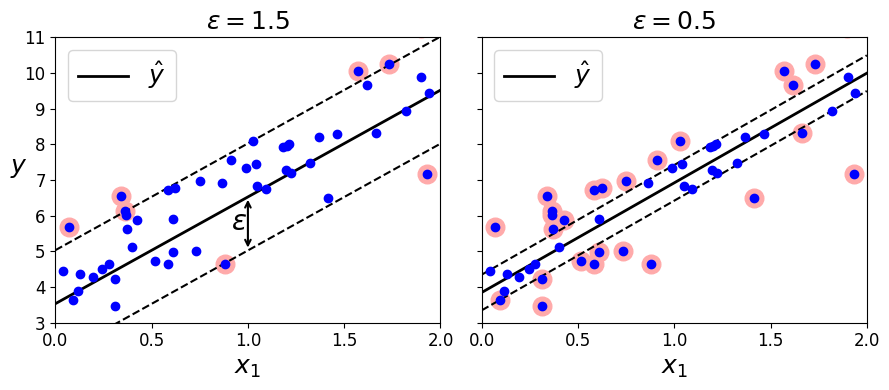

In [33]:
def plot_svm_regression(svm_reg, X, y, axes):
    # 결정경계 선과 도로 경계 그리기
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")   # 결정경계 선 (검은 실선)
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")                 # 위쪽 도로 경계 (검은 파선)
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")                 # 아랫쪽 도로 경계 (검은 파선)

    # X 데이터셋의 샘플 중에서 마진 오류 샘플 표시하기 (분홍 원)
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')

    # X, y 데이터셋 표기 (파랑 점)
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)

# x1=1을 이용하여 결정경계 도로 폭(epsilon) 위아래 화살표로 표시하기
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

# 오른편 그림
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

아아래 코드는 다중 커널을 이용하는 비선형 SVM 회귀를 설명하기 위해 100개의 샘플을 2차 다항식과 잡음을 이용하여 생성한다.


In [34]:
from sklearn.svm import SVR
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

아래 코드는 마진 오류 허용 정도(C)를 달리하며 2차 다항 커널을 사용하는 두 SVR 모델의 훈련 결과를 보여준다.

왼편 그림은 C=100 일때이며 이때 규제 보다 약하며 샘플에 덜 민감하고 마진 오류보다 적게 훈련 결과가 나오며

오른편 그림은 c=0.01일때 훈련 결과는 규제 보다 강하고 샘플에 더 민감하며 마진 오류 보다 많이 훈련 결과가 나오게 된다.

다음은 그 그림에 대한 코드이다.

그림 저장: svm_with_polynomial_kernel_plot


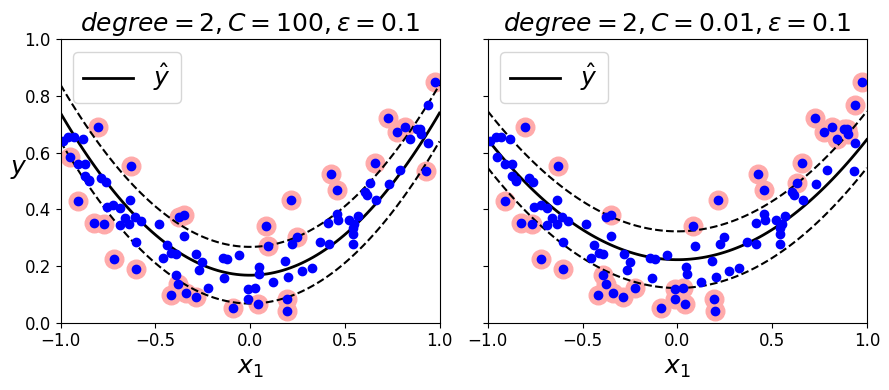

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그림: C=100
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# 오른편 그림: C=0.01
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

##5.4 SVM 이론

다음 코드는 버지니카 품종 여부 판정을 위해 훈련된 선형 SVM 분류 모델을 보여준다.

검정 실선을 결정경계로 하여 결정 함수값이 0이 되도록 하는 샘플들이고

점선은 결정 함수값이 1, -1이 되도록 하는 샘플들의 집합이다.

그림 저장: iris_3D_plot


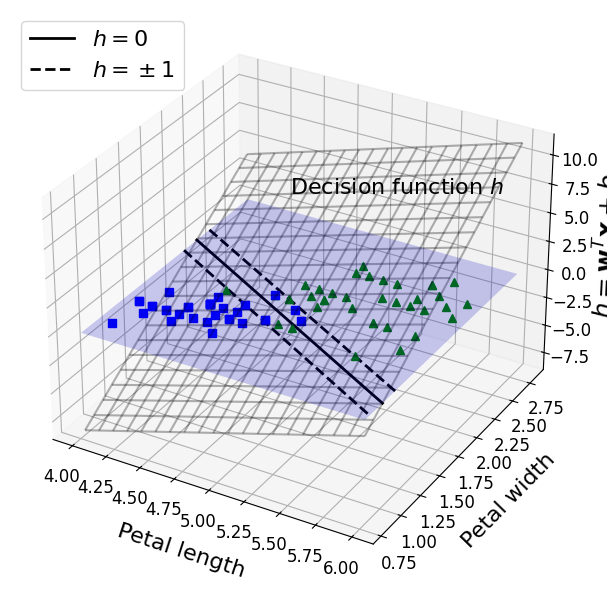

In [38]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # 버지니카 품종 여부

from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig("iris_3D_plot")
plt.show()

아래 두 코드는 $w_1$값에 따른 목적함수를 설명하는 그림이다.


그림 저장: small_w_large_margin_plot


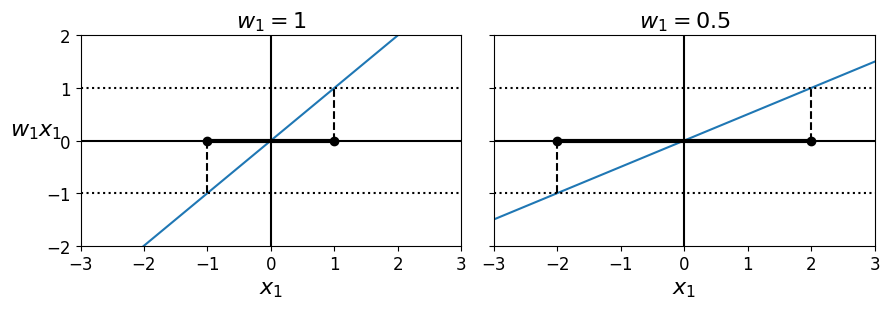

In [39]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("small_w_large_margin_plot")
plt.show()

아래 코드는 힌지 손실 함수의 그래프에 대한 함수이다.

그림 저장: hinge_plot


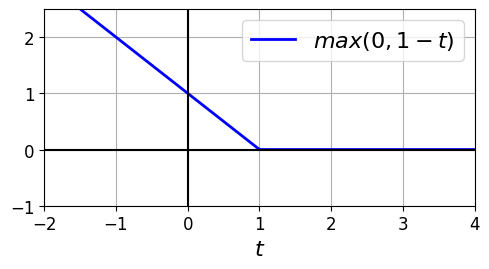

In [40]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
save_fig("hinge_plot")
plt.show()